In [1]:
import os
import pandas as pd
import face_recognition
import matplotlib.pyplot as plt
import cv2
import numpy as np

ruta_carpeta_inicial = '/home/waldos/Documents/2doCodigo/TopicoIA/BD/FER'
#ruta_carpeta_inicial = '/home/waldos/Documents/2doCodigo/TopicoIA/BD/FERPrueba'

Primero inspeccionamos la carpeta y todas las fotos le extraemos las caracteristicas del rostro. Las asignamos en 4 categorias

In [2]:
#Crear lista para almacenar datos de imagenes
directorio = []

for nombre_carpeta in os.listdir(ruta_carpeta_inicial):
    ruta_carpeta = os.path.join(ruta_carpeta_inicial, nombre_carpeta)
    if os.path.isdir(ruta_carpeta):
        for nombre_archivo in os.listdir(ruta_carpeta):
            try:
                ruta_archivo = os.path.join(ruta_carpeta, nombre_archivo)
                imagen_BGR = cv2.imread(ruta_archivo)

                imagen_Gray = cv2.cvtColor(imagen_BGR, cv2.COLOR_BGR2GRAY)

                #imagen_redimensionada = cv2.resize(imagen_Gray,(150,150))
                imagen_redimensionada = imagen_BGR

                #caracteristicas_faciales = face_recognition.face_landmarks(imagen_redimensionada)
                
                #arriba,derecha,abajo,izquierda = face_recognition.face_locations(imagen_redimensionada)[0]

                #cara_recortada = imagen_redimensionada[arriba:abajo, izquierda:derecha]
                directorio.append([imagen_redimensionada, None, None, nombre_carpeta])
            except Exception as e:
                print("Error en archivo:"+str(nombre_archivo)+":"+str(e))
print("Proceso terminado")

Proceso terminado


Creamos el Dataset en formato Pandas

In [3]:
columnas = ['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta']
df = pd.DataFrame(directorio, columns=columnas)
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[178, 178, 178], [194, 194, 194], [206, 206,...",None,None,surprise
1,"[[[87, 87, 87], [92, 92, 92], [69, 69, 69], [5...",None,None,surprise
2,"[[[126, 126, 126], [129, 129, 129], [136, 136,...",None,None,surprise
3,"[[[183, 183, 183], [186, 186, 186], [172, 172,...",None,None,surprise
4,"[[[251, 251, 251], [250, 250, 250], [249, 249,...",None,None,surprise


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Imagen           35887 non-null  object
 1   Caracteristicas  0 non-null      object
 2   Rostro           0 non-null      object
 3   Etiqueta         35887 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [5]:
etiquetas_distintas = df['Etiqueta'].unique()

# Mostrar las etiquetas distintas
print("Etiquetas distintas en la columna 'Etiqueta':")
for etiqueta in etiquetas_distintas:
    print(etiqueta)

Etiquetas distintas en la columna 'Etiqueta':
surprise
neutral
happy
disgust
angry
sad
fear


Guardar el dataset

In [6]:
df.to_hdf('BD_Emotions_ForCNN.h5', key='dataframe', mode = 'w')

/tmp/ipykernel_52239/3979484137.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta'], dtype='object')]

  df.to_hdf('BD_Emotions_ForCNN.h5', key='dataframe', mode = 'w')


Leer archivo creado

In [7]:
import pandas as pd
df_HDF = pd.read_hdf('BD_Emotions_ForCNN.h5')

In [8]:
print(df_HDF.shape[1])

4


In [9]:
df_HDF.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[178, 178, 178], [194, 194, 194], [206, 206,...",None,None,surprise
1,"[[[87, 87, 87], [92, 92, 92], [69, 69, 69], [5...",None,None,surprise
2,"[[[126, 126, 126], [129, 129, 129], [136, 136,...",None,None,surprise
3,"[[[183, 183, 183], [186, 186, 186], [172, 172,...",None,None,surprise
4,"[[[251, 251, 251], [250, 250, 250], [249, 249,...",None,None,surprise


Impresión de los datos para verlos gŕaficamente

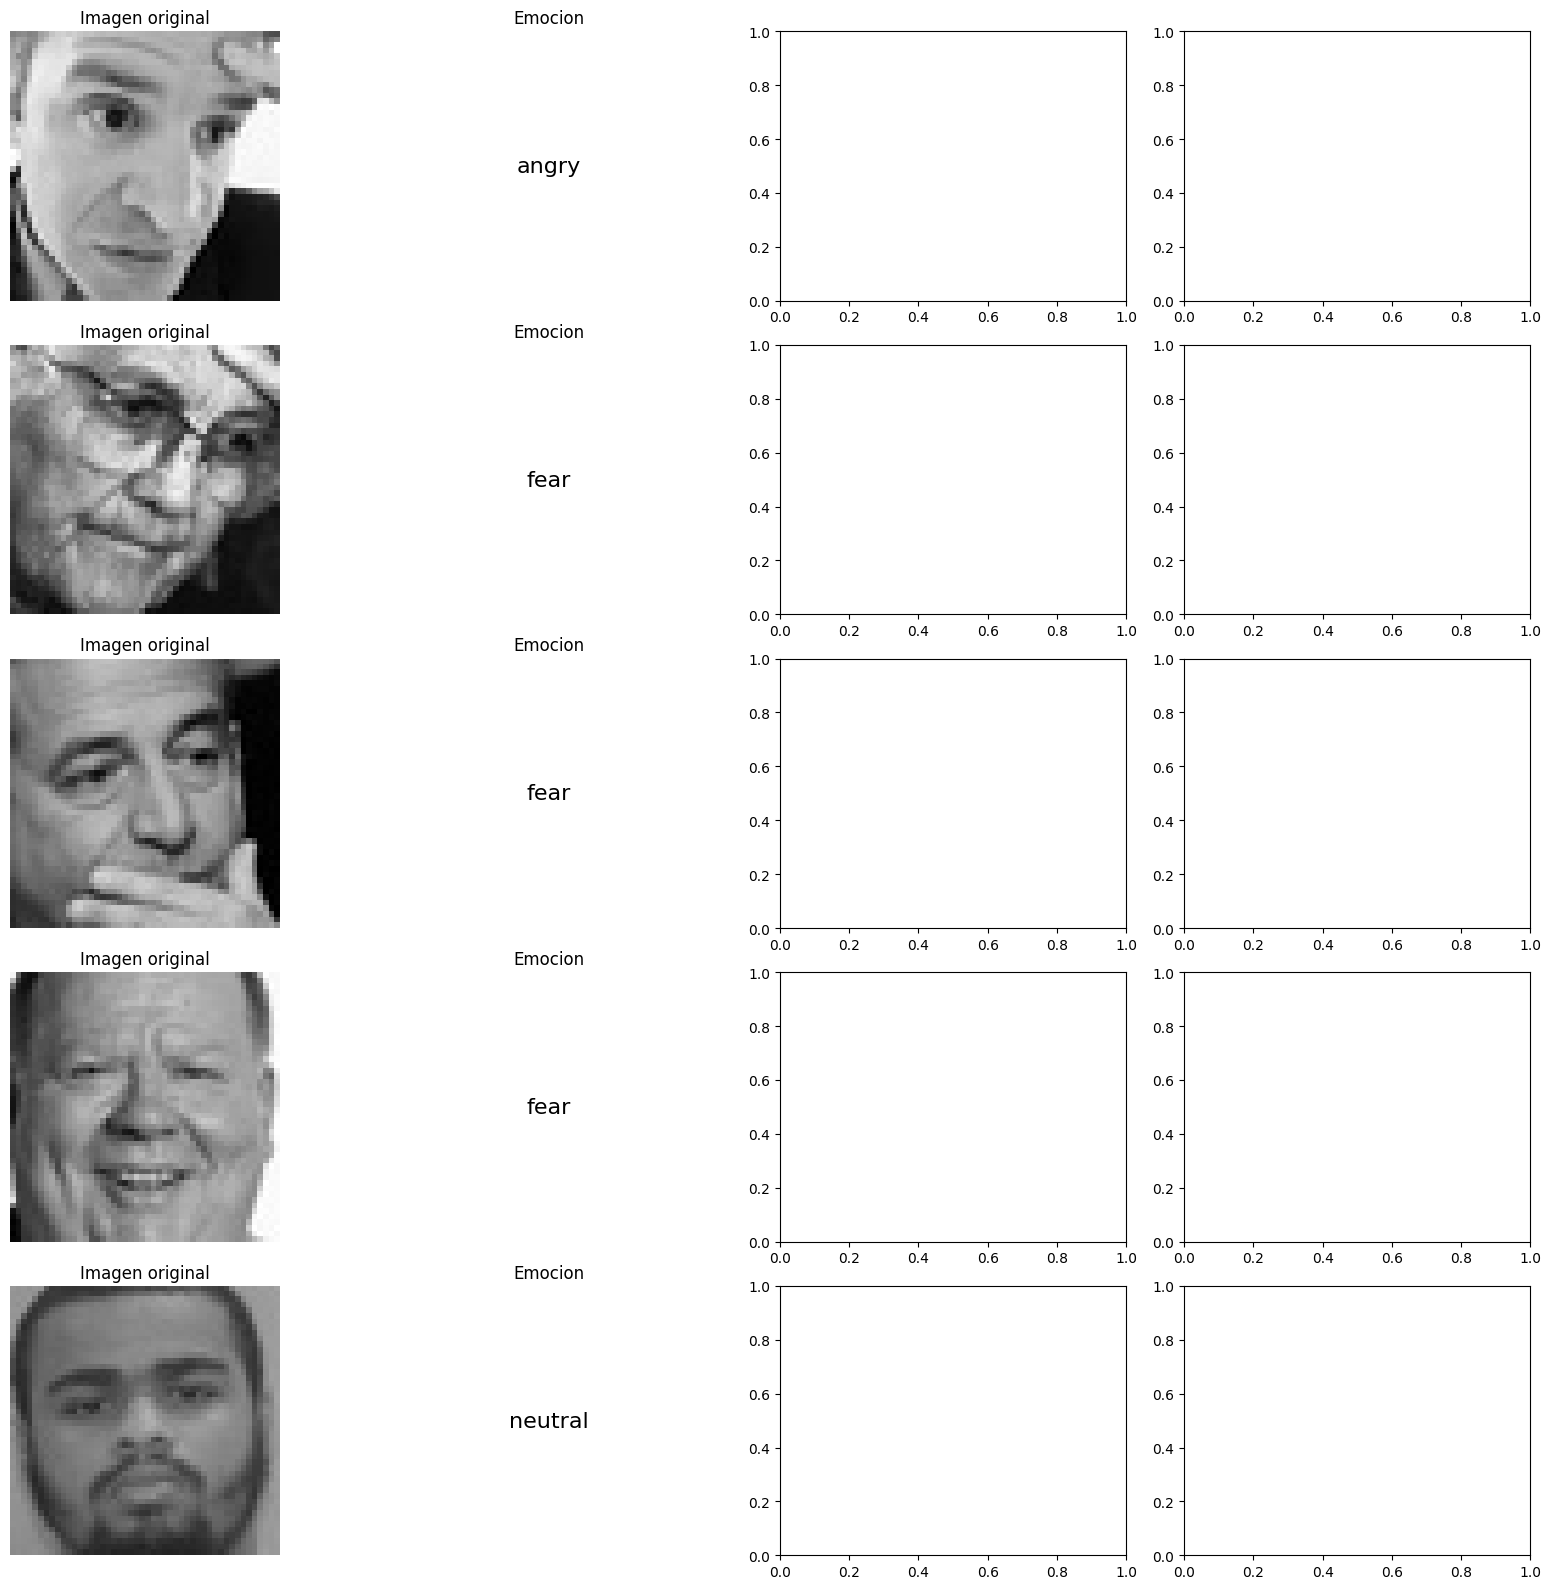

In [10]:
import matplotlib.pyplot as plt

df_ejemploHDF = df_HDF.sample(n=5)
columnas_dfHDF = df_HDF.shape[1]

fig, axes = plt.subplots(nrows = len(df_ejemploHDF), ncols=columnas_dfHDF, figsize=(16,16))

for i, (index, row) in enumerate(df_ejemploHDF.iterrows()):
    ax0 = axes[i,0]
    ax0.imshow(row['Imagen'])
    ax0.set_title('Imagen original')
    ax0.axis('off')


    ax3 = axes[i,1]

    ax3.text(0.5, 0.5, row['Etiqueta'], horizontalalignment= 'center',verticalalignment='center',fontsize=16)
    ax3.set_title('Emocion')
    ax3.axis('off')
plt.tight_layout()
plt.show()
    
    
    